Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the data. This will be combined into 1 dataframe called df

In [2]:
df1 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/1856386b-a196-4e7c-be81-44174e29ad50/download/vehicle-fuel-type-count-by-zip-code.csv')
df2 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/888bbb6c-09b4-469c-82e6-1b2a47439736/download/vehicle-fuel-type-count-by-zip-code.csv')
df3 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/4254a06d-9937-4083-9441-65597dd267e8/download/vehicle-fuel-type-count-by-zip-code.csv')
df4 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/d304108a-06c1-462f-a144-981dd0109900/download/vehicle-fuel-type-count-by-zip-code.csv')


C:\Users\schowdho\AppData\Local\Temp\ipykernel_2976\3466865124.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/1856386b-a196-4e7c-be81-44174e29ad50/download/vehicle-fuel-type-count-by-zip-code.csv')
C:\Users\schowdho\AppData\Local\Temp\ipykernel_2976\3466865124.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/888bbb6c-09b4-469c-82e6-1b2a47439736/download/vehicle-fuel-type-count-by-zip-code.csv')
C:\Users\schowdho\AppData\Local\Temp\ipykernel_2976\3466865124.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/4254a06d-9937-4083-9441-65597dd267e

Combine the data

In [3]:
frames = [df1, df2, df3, df4]
df = pd.concat(frames)


Explore some basic information of the data

In [4]:
df.head(100)


,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2022,90000,2020,Gasoline,OTHER/UNK,Light,1
1,1/1/2022,90000,2022,Gasoline,OTHER/UNK,Light,1
2,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Heavy,22
3,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Light,20
4,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Unk,12
...,...,...,...,...,...,...,...
95,1/1/2022,90001,2010,Gasoline,LEXUS,Light,11
96,1/1/2022,90001,2010,Gasoline,KIA,Light,22
97,1/1/2022,90001,2010,Gasoline,SCION,Light,20
98,1/1/2022,90001,2010,Gasoline,ACURA,Light,13


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589061 entries, 0 to 586232
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Date        object
 1   Zip Code    object
 2   Model Year  object
 3   Fuel        object
 4   Make        object
 5   Duty        object
 6   Vehicles    int64 
dtypes: int64(1), object(6)
memory usage: 158.0+ MB


In [6]:
df.describe()

,Vehicles
count,2.589061e+06
mean,4.751321e+01
std,1.560435e+02
min,1.000000e+00
25%,1.100000e+01
50%,1.900000e+01
75%,4.300000e+01
max,3.599300e+04


In [7]:
df.shape

(2589061, 7)

Check for null values. luckily there are none

In [8]:
df.isnull().sum()


Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

Convert the Date column to datetime format for easier reading

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


Get the unique fuel types

In [10]:
df['Fuel'].unique()


array(['Gasoline', 'Other', 'Diesel and Diesel Hybrid', 'Natural Gas',
       'Hybrid Gasoline', 'Flex-Fuel', 'Battery Electric',
       'Plug-in Hybrid', 'Hydrogen Fuel Cell'], dtype=object)

Get the unique make types

In [11]:
df['Make'].unique()

array(['OTHER/UNK', 'FORD', 'PLYMOUTH', 'GMC', 'CHEVROLET', 'WHITE',
       'INFINITI', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'DODGE', 'JEEP',
       'HONDA', 'CHRYSLER', 'CADILLAC', 'NISSAN', 'TOYOTA', 'MAZDA',
       'BMW', 'HYUNDAI', 'LEXUS', 'KIA', 'SCION', 'FREIGHTLINER', 'ACURA',
       'MITSUBISHI', 'RAM', 'AUDI', 'MINI', 'BUICK', 'SUBARU', 'TESLA',
       'MERCURY', 'LINCOLN', 'PORSCHE', 'VOLVO', 'HUMMER', 'PONTIAC',
       'OLDSMOBILE', 'SATURN', 'ISUZU', 'JAGUAR', 'SUZUKI', 'LAND ROVER',
       'GEO', 'FIAT', 'GENESIS', 'SAAB', 'HINO', 'LAMBORGHINI',
       'ROLLS-ROYCE', 'WORKHORSE', 'INTERNATIONAL', 'AMERICAN LAFRANCE',
       'NORTH AMERICAN BUS INDUSTRIES', 'PETERBILT',
       'MOTOR COACH INDUSTRIES', 'NEWFLYER', 'KENWORTH', 'BLUE BIRD',
       'GILLIG', 'AUTOCAR', 'PIERCE', 'IC BUS', 'NEW FLYER', 'PROTERRA',
       'NEOPLAN', 'OSHKOSH', 'ORION', 'FWD', 'FLXIBLE TRANSIT COACHES',
       'MACK', 'TMC GREYHOUND', 'STERLING', 'WHITE/GMC',
       'PIERCE MANUFACTURING', 'ALFA ROMEO

Plotting the number of vehicles based on fuel type

In [12]:
fuel_counts = df.groupby('Fuel')['Vehicles'].sum().reset_index()

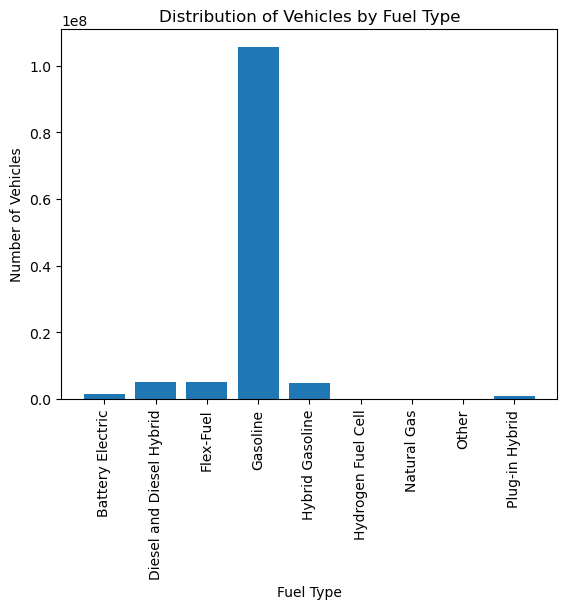

In [13]:
plt.bar(fuel_counts['Fuel'], fuel_counts['Vehicles'])
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Fuel Type')
plt.show()

determine how many vehicles are of a certain make

In [14]:
# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_make = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_make)
    
    # calculate the total number of vehicles
df['Vehicles'].count()
  


Fuel
Gasoline                    1557312
Diesel and Diesel Hybrid     321224
Flex-Fuel                    294811
Hybrid Gasoline              205454
Plug-in Hybrid                82426
Battery Electric              79481
Natural Gas                   23139
Other                         16426
Hydrogen Fuel Cell             8788
Name: Vehicles, dtype: int64


2589061

Lets represent the number of vehicles of a certain make as a ratio or percentage of the total number of vehicles in the dataset

In [15]:
# Get the count of each make
make_count = df['Make'].value_counts()

# Calculate the percentage of each make
make_percent = make_count / make_count.sum() * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(make_percent)


OTHER/UNK                         37.991843
FORD                               6.300779
TOYOTA                             6.082746
CHEVROLET                          4.948126
HONDA                              3.724709
NISSAN                             2.636709
LEXUS                              2.613998
DODGE                              2.476033
MERCEDES-BENZ                      2.230847
BMW                                2.189327
VOLKSWAGEN                         2.108486
HYUNDAI                            2.096513
JEEP                               2.014707
GMC                                1.925447
KIA                                1.905247
MAZDA                              1.897676
SUBARU                             1.865194
ACURA                              1.524684
AUDI                               1.347593
INFINITI                           1.120522
RAM                                1.049029
CHRYSLER                           0.940573
SCION                           

Lets represent the number of vehicles of a certain Fuel type as a ratio or percentage of the total number of vehicles in the dataset.

In [20]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_fuel)

Fuel
Gasoline                    1557312
Diesel and Diesel Hybrid     321224
Flex-Fuel                    294811
Hybrid Gasoline              205454
Plug-in Hybrid                82426
Battery Electric              79481
Natural Gas                   23139
Other                         16426
Hydrogen Fuel Cell             8788
Name: Vehicles, dtype: int64


In [21]:
# calculate the total number of vehicles
total_vehicles = df['Vehicles'].count()
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(total_vehicles)

2589061


In [16]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)

# calculate the total number of vehicles
total_vehicles = df['Vehicles'].count()

# calculate the percentage of vehicles for each fuel type
percentages = (vehicles_by_fuel / total_vehicles) * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percentages)

Fuel
Gasoline                    60.149684
Diesel and Diesel Hybrid    12.406969
Flex-Fuel                   11.386792
Hybrid Gasoline              7.935464
Plug-in Hybrid               3.183625
Battery Electric             3.069877
Natural Gas                  0.893722
Other                        0.634439
Hydrogen Fuel Cell           0.339428
Name: Vehicles, dtype: float64


<Figure size 1000x800 with 0 Axes>

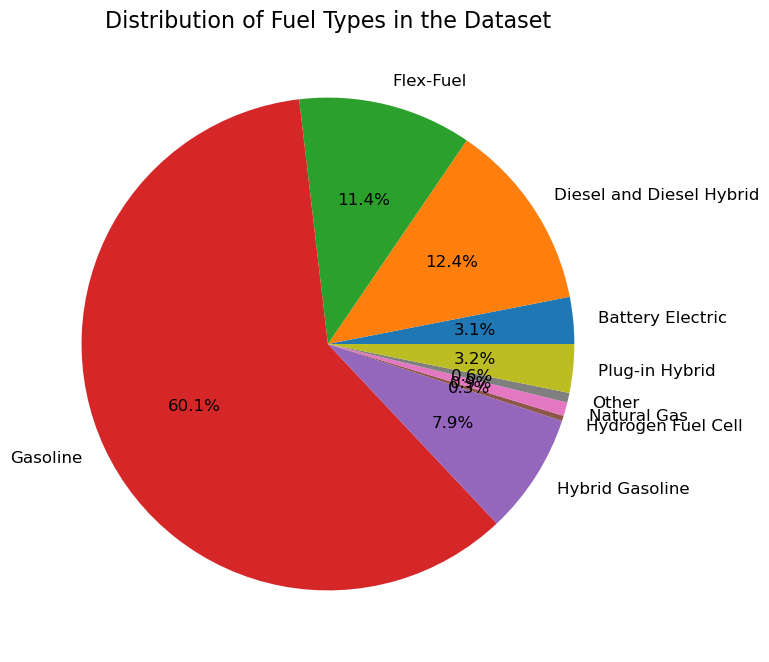

In [17]:
plt.figure(figsize=(10, 8)) # set the size of the figure
# group the data by fuel type and count the number of vehicles
fuel_counts = df.groupby('Fuel')['Vehicles'].count().reset_index()

# plot the distribution of fuel types using a pie chart


plt.figure(figsize=(10, 8))
plt.pie(fuel_counts['Vehicles'], labels=fuel_counts['Fuel'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Distribution of Fuel Types in the Dataset', fontsize=16)
plt.show()

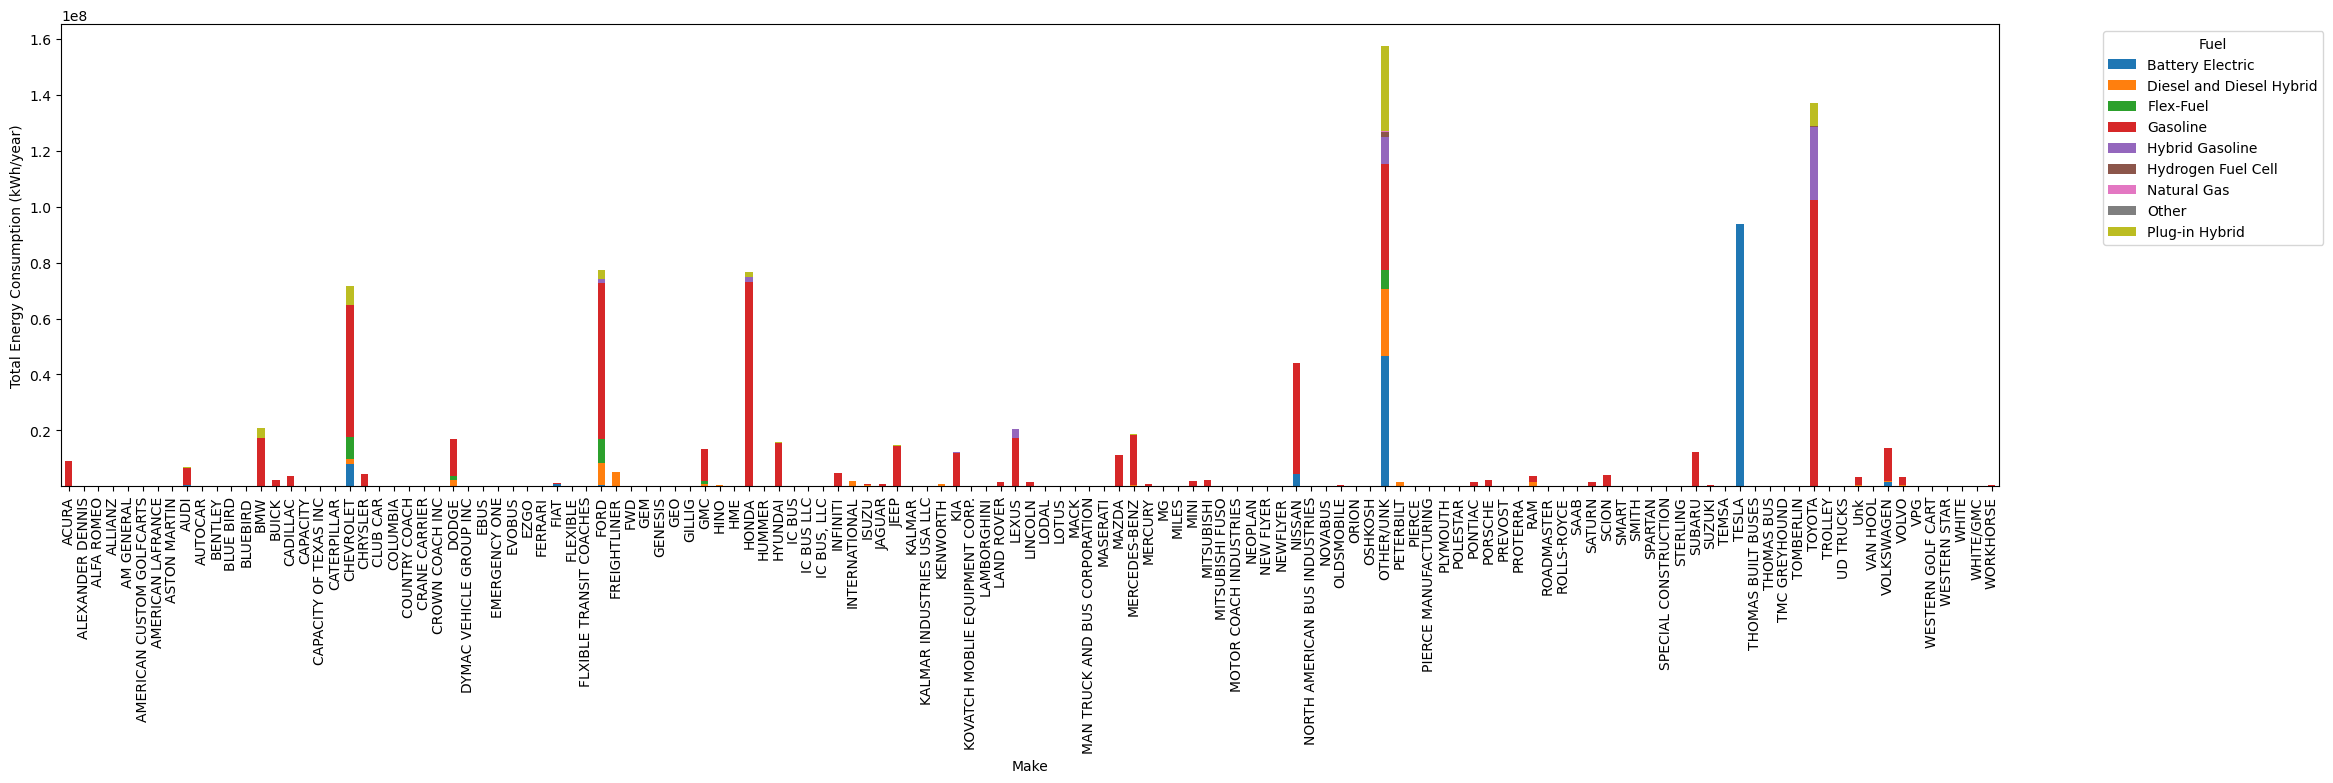

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define energy consumption values (kWh/mile) for each fuel type
energy_consumption = {'Gasoline': 0.015, 'Other': 0, 'Diesel and Diesel Hybrid': 0.018, 'Natural Gas': 0.02, 
                      'Hybrid Gasoline': 0.025, 'Flex-Fuel': 0.015, 'Battery Electric': 0.3, 
                      'Plug-in Hybrid': 0.15, 'Hydrogen Fuel Cell': 0.2}

# Convert Duty variable to numerical (Light = 1, Heavy = 2)
df['Duty'] = df['Duty'].map({'Light': 1, 'Heavy': 2})

# Add a new column to the DataFrame to represent energy consumption per mile
df['Energy Consumption (kWh/mile)'] = df['Fuel'].map(energy_consumption)

# Calculate energy consumption per vehicle per year (kWh/year)
df['Energy Consumption (kWh/year)'] = df['Vehicles'] * df['Duty'] * df['Energy Consumption (kWh/mile)'] * 365

# Group the data by Make and Fuel, and sum the total energy consumption per year
grouped = df.groupby(['Make', 'Fuel'])['Energy Consumption (kWh/year)'].sum().unstack()

# Plot the total energy consumption by Make and Fuel using a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 6))
ax.set_ylabel('Total Energy Consumption (kWh/year)')
ax.legend(title='Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


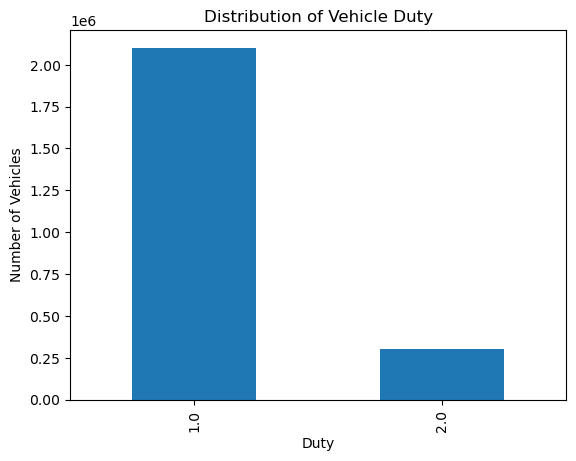

In [19]:
import matplotlib.pyplot as plt

# Count the number of light and heavy vehicles
duty_counts = df['Duty'].value_counts()

# Plot the results as a bar chart
duty_counts.plot(kind='bar')
plt.xlabel('Duty')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Duty')
plt.show()